In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os
from linear_regression import LinearRegression
from gradient_descent import GradientDescent, quad, quadGrad
%matplotlib inline

##4.1

 
--- Minimization Summary --- 
x_min is = [ 0.95502774  0.46636837]
f_min is = 9.84991790448
achieved tolerance = 2.10603643768
numFunctionCalls = 50001
---------------------------- 
 


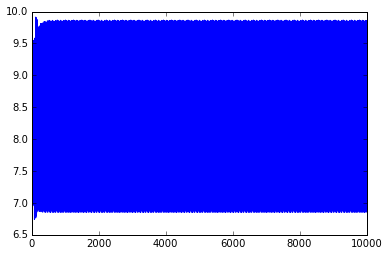

 
--- Scipy Minimization Summary --- 
x_min is = [ 1.10778525  0.84392575]
f_min is = 6.48225569196
numFunctionCalls = 200
---------------------------- 
 
|w_gd - w_scipy|^2 is
0.407289125956
 
--- Linear Regression Results ---
x_min is = [ 1.57088097  0.36558255]
f_min is = 7.89728929988
|w_gd - w_ols|^2 is
0.624045661044
|w_scipy - w_ols|^2 is
0.665785156909


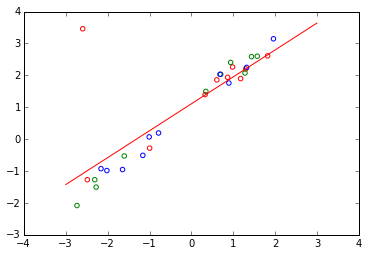

In [5]:
def plot(lr,w, plot_sin=True, plot_test=True, plot_validate=True):
    # plot sin(2*phi*x) in green
    x_min = np.amin(lr.x)
    x_max = np.amax(lr.x)
    x = np.linspace(-3,3,1000)
    M = lr.numFeatures - 1
    
    lr_temp = LinearRegression(x,x,lr.numFeatures-1)
    reg_prediction = np.dot(lr_temp.phi,w)
    
    lr_validate = LinearRegression.fromFile(validate_filename, M)
    lr_test = LinearRegression.fromFile(test_filename, M)
    
    plt.plot(x, reg_prediction, color='r')
    
    # the training set is plotted in blue
    plt.scatter(lr.x, lr.y, color='r', marker='o',facecolors='none')
    
    # test set plotted in green
    if plot_test:
        plt.scatter(lr_test.x, lr_test.y, color='g', marker='o',facecolors='none')
        
    # validation set plotted in orange
    if plot_test:
        plt.scatter(lr_validate.x, lr_validate.y, color='b', marker='o',facecolors='none')
              
    plt.show()

def gradDescentSAE(M):
    lr = LinearRegression.fromFile(filename, M)
    w_initial = 1.0*lr.reg()
    gd = GradientDescent(lr.SAEwReg)
    gd.stepSize = 0.05
    gd.tol = 1e-8
    (w, sae, _, _) = gd.computeMin(w_initial, printSummary=True, storeIterValues=True, useGradientCriterion=False, maxFunctionCalls=50000)
    gd.plotIterValues()
    
    res = opt.minimize(lr.SAEwReg, w_initial)
    print " "
    print "--- Scipy Minimization Summary --- "
    print "x_min is = " + str(res.x)
    print "f_min is = " + str(res.fun)
    print "numFunctionCalls = " + str(res.nfev)
#     print "numIterations = " + str(res.nit)
    print "---------------------------- "
    print " "
    
    print "|w_gd - w_scipy|^2 is"
    print np.linalg.norm(w - res.x)
    
    w_reg = lr.reg()
    print " "
    print "--- Linear Regression Results ---"
    print "x_min is = " + str(w_reg)
    print "f_min is = " + str(lr.SAEwReg(lr.reg()))
    
    print "|w_gd - w_ols|^2 is"
    print np.linalg.norm(w - w_reg)
    
    print "|w_scipy - w_ols|^2 is"
    print np.linalg.norm(res.x - w_reg)

    plot(lr,res.x)
    
    return (lr, gd, res.x, sae)


def modelSelection(M, showPlot=False):
    sseVal = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[0]
    sseTest = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[1]
    sseTrain = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[2]
    
    sseVal_vec = np.vectorize(sseVal)
    sseTest_vec = np.vectorize(sseTest)
    sseTrain_vec = np.vectorize(sseTrain)
    
    lam_vec = np.linspace(0,10,200)
    a = sseVal_vec(lam_vec)
    b = sseTest_vec(lam_vec)
    c = sseTrain_vec(lam_vec)
    
    lam_min_idx = np.argmin(a)
    lam_min = lam_vec[lam_min_idx]
    
    lr_train = lr_train = LinearRegression.fromFile(train_filename, M)
    w_ridge = lr_train.ridge(lam_min)
    

    if showPlot:
#         plt.plot(lam_vec, a, color='b')
#         plt.plot(lam_vec, b, color='g')
        plot(lr_train, w_ridge, plot_sin=False, plot_test=True, plot_validate=True)
        plt.show()
        
    print " "
    print "-------------"
    print "M = " + str(M)
    print "argmin lambda = " + str(lam_min)
    print "SSE_train = " + str(c[lam_min_idx])
    print "SSE_val = " + str(a[lam_min_idx])
    print "SSE_test = " + str(b[lam_min_idx])
    print "----------------"
    print " "


filename = 'regress_train.txt'
M = 1

test_filename = "regress_test.txt"
train_filename = "regress_train.txt"
validate_filename = "regress_validate.txt"


(lr, gd, w, sse) = gradDescentSAE(M)

In [ ]:
def plot(lr, w, plot_sin=True, plot_test=False, plot_validate=False):
    # plot sin(2*phi*x) in green
    x_min = np.amin(lr.x)
    x_max = np.amax(lr.x)
    x = np.linspace(-3,3,1000)
    M = lr.numFeatures - 1
    sin_x = np.sin(2*np.pi*x)
    lr_temp = LinearRegression(x,x,lr.numFeatures-1)
    reg_prediction = np.dot(lr_temp.phi,w)
    
    lr_validate = LinearRegression.fromFile(validate_filename, M)
    lr_test = LinearRegression.fromFile(test_filename, M)
    
    
    if plot_sin:
        plt.plot(x,sin_x, color='g')
        
    plt.plot(x, reg_prediction, color='r')
    
    # the training set is plotted in blue
    plt.scatter(lr.x, lr.y, color='r', marker='o',facecolors='none')
    
    # test set plotted in green
    if plot_test:
        plt.scatter(lr_test.x, lr_test.y, color='g', marker='o',facecolors='none')
        
    # validation set plotted in orange
    if plot_test:
        plt.scatter(lr_validate.x, lr_validate.y, color='b', marker='o',facecolors='none')
        
        
    plt.show()
    
def plotRidge(M,lam):
    lr = LinearRegression.fromFile(filename, M)
    w_ridge = lr.ridge(lam)
    sse = lr.SSE(w_ridge)
    plot(lr,w_ridge)
    print " "
    print "--Ridge Regression Statistics--"
    print "w_ridge = " + str(w_ridge)
    print "SSE = " + str(sse) 
    

def computeRidge(M, lam, train, test, validate, verbose=True):
    lr_train = LinearRegression.fromFile(train, M)
    lr_validate = LinearRegression.fromFile(validate, M)
    lr_test = LinearRegression.fromFile(test, M)
    
    w_ridge = lr_train.ridge(lam)
    sse_train = lr_train.SSE(w_ridge)
    sse_test = lr_test.SSE(w_ridge)
    sse_validate = lr_validate.SSE(w_ridge)
    
    if verbose:
        print "--Ridge Regression Statistics--"
        print "w_ridge = " + str(w_ridge)
        print "SSE_train = " + str(sse_train)
        print "SSE_validate = " + str(sse_validate)
        print "SSE_test = " + str(sse_test)

        plot(lr_train, w_ridge, plot_sin=False, plot_test=True, plot_validate=True)
    
    return (sse_validate, sse_test, sse_train)

def modelSelection(M, showPlot=False):
    sseVal = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[0]
    sseTest = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[1]
    sseTrain = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[2]
    
    sseVal_vec = np.vectorize(sseVal)
    sseTest_vec = np.vectorize(sseTest)
    sseTrain_vec = np.vectorize(sseTrain)
    
    lam_vec = np.linspace(0,10,200)
    a = sseVal_vec(lam_vec)
    b = sseTest_vec(lam_vec)
    c = sseTrain_vec(lam_vec)
    
    lam_min_idx = np.argmin(a)
    lam_min = lam_vec[lam_min_idx]
    
    lr_train = lr_train = LinearRegression.fromFile(train_filename, M)
    w_ridge = lr_train.ridge(lam_min)
    

    if showPlot:
#         plt.plot(lam_vec, a, color='b')
#         plt.plot(lam_vec, b, color='g')
        plot(lr_train, w_ridge, plot_sin=False, plot_test=True, plot_validate=True)
        plt.show()
        
    print " "
    print "-------------"
    print "M = " + str(M)
    print "argmin lambda = " + str(lam_min)
    print "SSE_train = " + str(c[lam_min_idx])
    print "SSE_val = " + str(a[lam_min_idx])
    print "SSE_test = " + str(b[lam_min_idx])
    print "----------------"
    print " "
    
    


    
filename = "curvefitting.txt"
test_filename = "regress_test.txt"
train_filename = "regress_train.txt"
validate_filename = "regress_validate.txt"
M = 1
lam =1.14
# plotRidge(M, lam)
computeLAD(M, lam, train_filename, test_filename, validate_filename, verbose=True)

# sseVal = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[0]
# sseTest = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[1]

# sseVal_vec = np.vectorize(sseVal)
# sseTest_vec = np.vectorize(sseTest)

# lam_vec = np.linspace(0,10,100)
# a = sseVal_vec(lam_vec)
# b = sseTest_vec(lam_vec)

# plt.plot(lam_vec, a, color='b')
# plt.plot(lam_vec, b, color='g')

for m in range(0,6):
    modelSelection(m, showPlot=False)
    

  

sseVal_vec(np.array([1,2]))

### Blog Feedback

In [ ]:
lr_train = LinearRegression.fromBlog(type='train')
lr_validate = LinearRegression.fromBlog(type='val')
lr_test = LinearRegression.fromBlog(type='test')

In [ ]:
def computeBlogRidge(lam, verbose=True):
    
    print "evaluating for a specific lambda"
    
    w_ridge = lr_train.ridge(lam)
    mse_train = lr_train.MSE(w_ridge)
    mse_test = lr_test.MSE(w_ridge)
    mse_validate = lr_validate.MSE(w_ridge)
    
    if verbose:
        print "--Ridge Regression Statistics--"
#         print "w_ridge = " + str(w_ridge)
        print "MSE_train = " + str(mse_train)
        print "MSE_validate = " + str(mse_validate)
        print "MSE_test = " + str(mse_test)
    
    return (mse_validate, mse_test, mse_train)

def blogModelSelection(showPlot=True):
    sseVal = lambda x: computeBlogRidge(x, verbose=False)[0]
    sseTest = lambda x: computeBlogRidge(x, verbose=False)[1]
    sseTrain = lambda x: computeBlogRidge(x, verbose=False)[2]
    num_obs = 1.0*np.shape(lr_train.phi)[0]
    
    sseVal_vec = np.vectorize(sseVal)
    sseTest_vec = np.vectorize(sseTest)
    sseTrain_vec = np.vectorize(sseTrain)
    
    lam_vec = num_obs*np.linspace(0.001,20,10)
    a = sseVal_vec(lam_vec)
    b = sseTest_vec(lam_vec)
    c = sseTrain_vec(lam_vec)
    
    lam_min_idx = np.argmin(a)
    lam_min = lam_vec[lam_min_idx]
    
    
    

    if showPlot:
#         plt.plot(lam_vec, c, color='r')
#         plt.plot(lam_vec/num_obs, a, color='b')
        plt.plot(lam_vec, b, color='g')
        plt.show()
        
    print " "
    print "-------------"
    print "argmin lambda = " + str(lam_min)
    print "argmin lambda/num_obs = " + str(lam_min/(num_obs))
    print "MSE_train = " + str(c[lam_min_idx])
    print "MSE_val = " + str(a[lam_min_idx])
    print "MSE_test = " + str(b[lam_min_idx])
    print "----------------"
    print " " 
    

# lr_train = LinearRegression.fromBlog(type='train')
blogModelSelection()

In [ ]:
num_obs = 31437
computeBlogRidge(num_obs*30)

## 4.2

In [ ]:
(lasso,_,_,_,_) = LinearRegression.fromLASSOData()
np.shape(lasso.phi)


w_reg = lasso.reg()
print w_reg

w = lasso.Lasso(0, w_0=w_reg)
print w
